In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.style.use('ggplot')

In [155]:
data = pd.read_csv('../datasets/Fish.csv')

print(data.columns)
print('\n\n')
print(data.head())

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')



  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


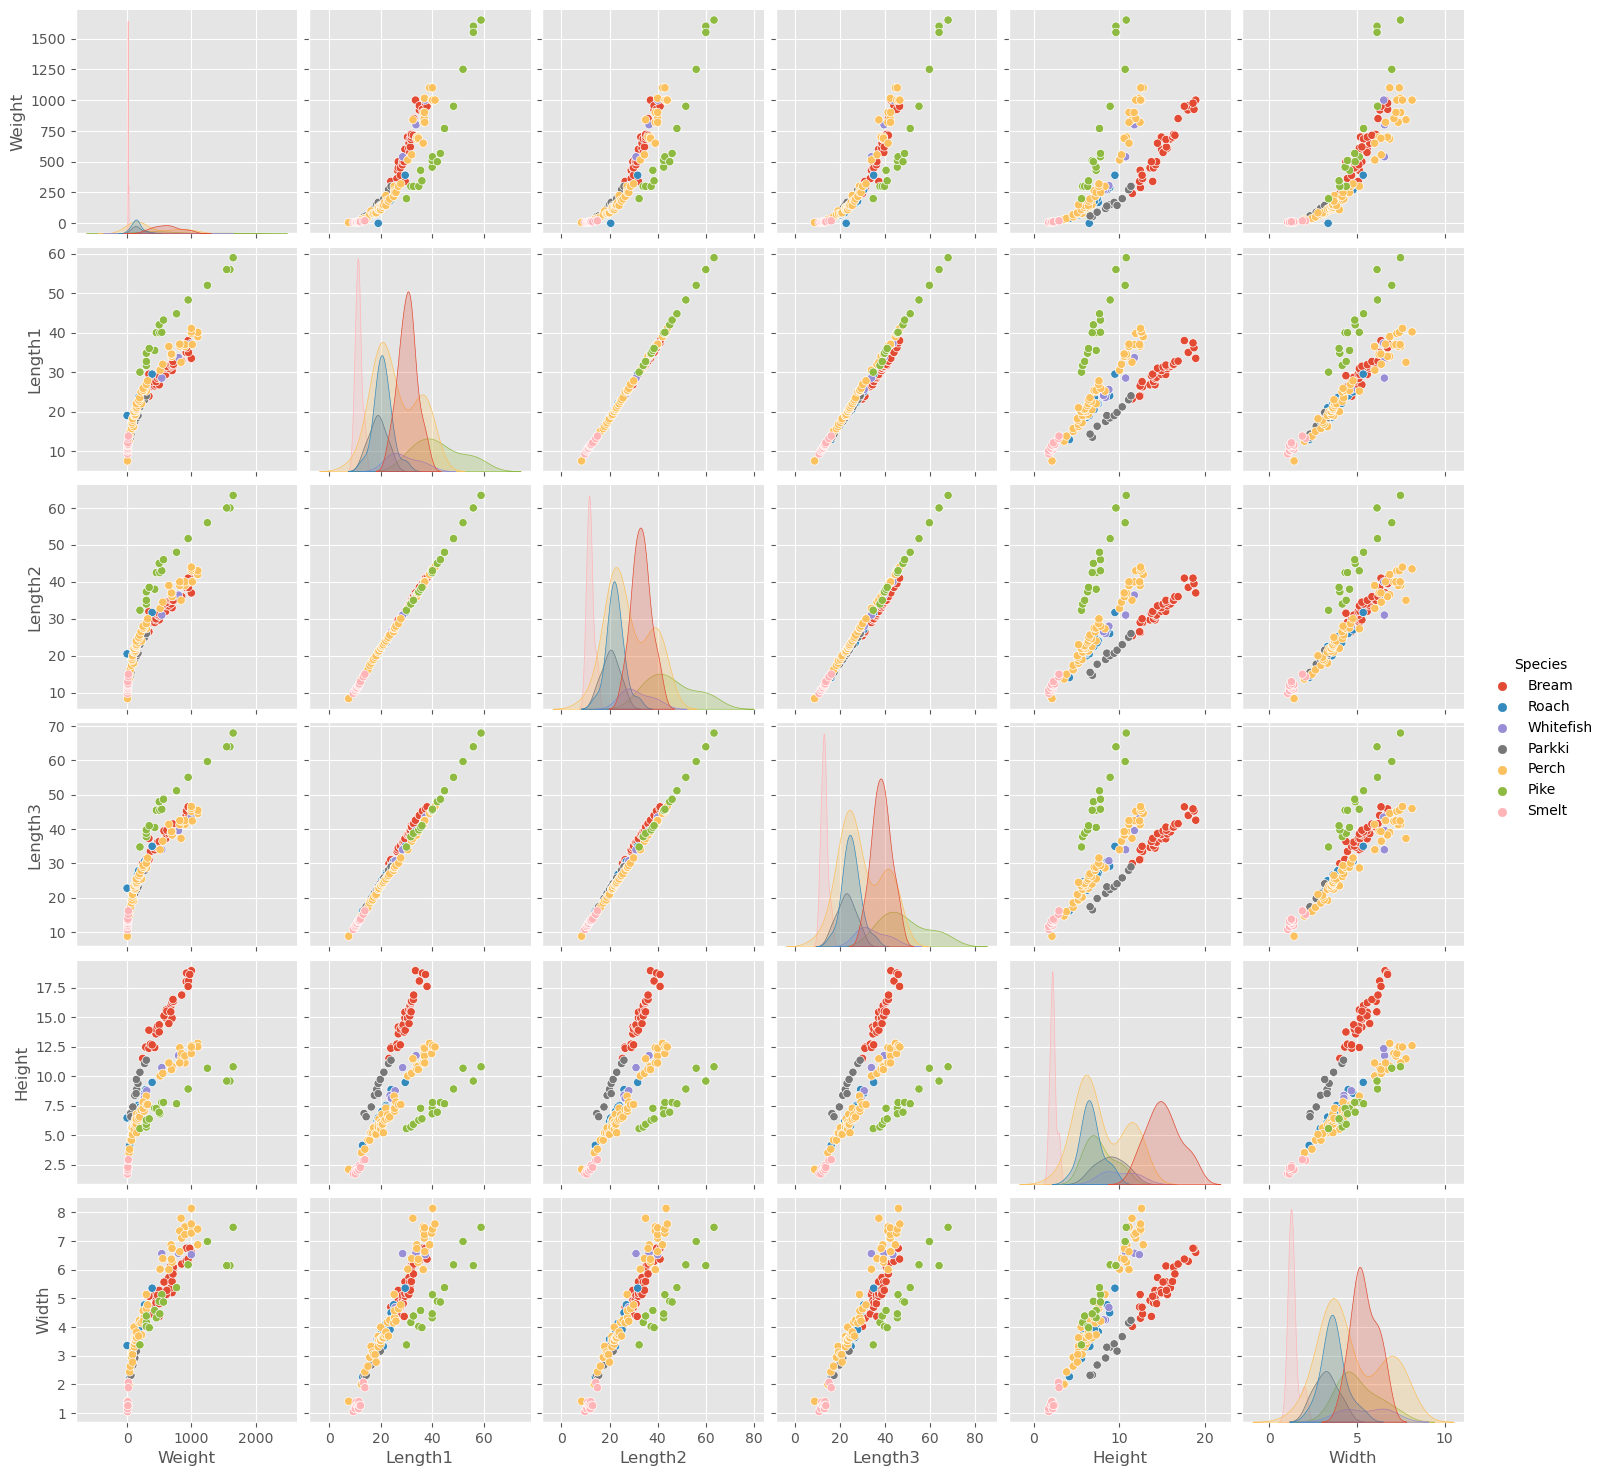

In [156]:
sns.pairplot(data, hue='Species')

In [157]:
Xs = data.Width
ys = data.Weight

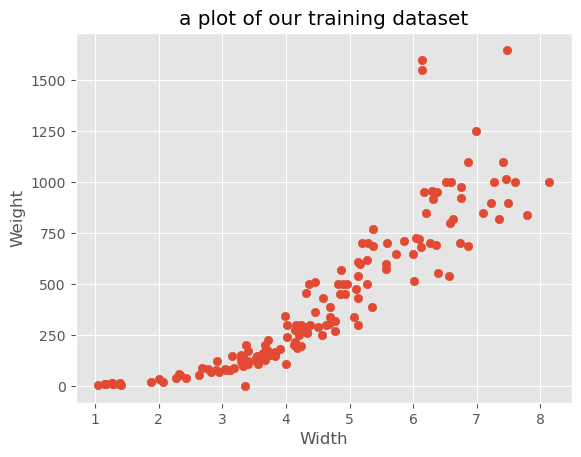

In [158]:
plt.scatter(Xs, ys)
plt.title('a plot of our training dataset')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.show()

In [98]:
class linear_regressor : 
    def __init__(self, alpha):
        self.theta0, self.theta1 = self.initializer()
        self.alpha = alpha
        
    def hypothesis(self, x):
        y = self.theta0 + (self.theta1 * x)
        return y
    
    def initializer(self):
        np.random.seed(10)
        return np.random.random(2)
    
    def loss_function(self, x, y):
        if type(x) == float :
            return (1/(2*len(x))) * (self.hypothesis(x) - y)**2
        else :
            return (1/(2*len(x))) * ((self.hypothesis(x) - y)**2).sum()
    
    def update(self, x, y):
        if type(x) == float :
            delta_theta0 = self.hypothesis(x) - y
            delta_theta1 = (self.hypothesis(x) - y) * x
        else :
            delta_theta0 = (self.hypothesis(x) - y).sum() * 1/len(x)
            delta_theta1 = ((self.hypothesis(x) - y) * x).sum() * 1/len(x)
            
        self.theta0 = (self.theta0 - (self.alpha * delta_theta0))
        self.theta1 = (self.theta1 - (self.alpha * delta_theta1))

        
    def normalizer(self, Xs, ys):
        Xs = (Xs - Xs.mean()) / Xs.std()
        ys = (ys - ys.mean()) / ys.std()
        return Xs, ys

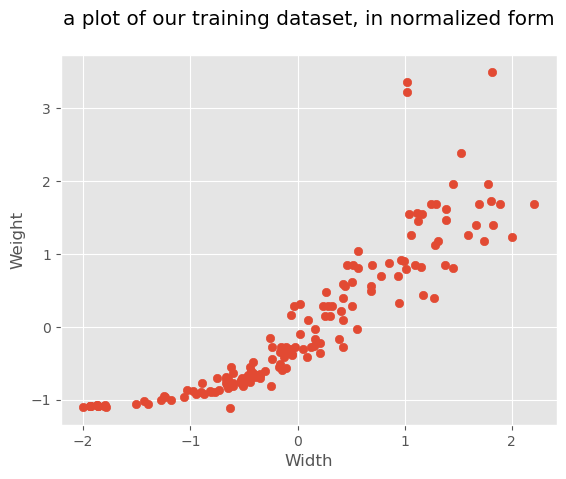

In [158]:
reg = linear_regressor(0.1)
Xs , ys = reg.normalizer(Xs, ys)
plt.scatter(Xs, ys)
plt.title('a plot of our training dataset, in normalized form\n')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.show()

In [159]:
fig, ax = plt.subplots()
losses = []

def animate(i) :
    losses.append(reg.loss_function(Xs, ys))
    ax.cla()
    ax.set_title('prediction on training dataset\n')
    ax.set_xlabel('Width')
    ax.set_ylabel('Weight')
    ax.scatter(Xs, ys)
    ax.plot(Xs, reg.hypothesis(Xs))
    reg.update(Xs, ys)

ani = FuncAnimation(fig, animate, frames=40, interval=300)

plt.close()

In [160]:
HTML(ani.to_html5_video())

In [138]:
reg2 = linear_regressor(0.1)
tests = np.linspace(-2.2, 2.5, 100)

fig2, ax2 = plt.subplots()

def animate_on_tests(i): 
    ax2.cla()
    ax2.set_title('predicting on "tests" dataset\n')
    ax2.set_xlabel('Width')
    ax2.set_ylabel('Weight')
    ax2.scatter(Xs, ys)
    ax2.plot(tests, reg2.hypothesis(tests))
    reg2.update(Xs, ys)

ani2 = FuncAnimation(fig2, animate_on_tests, frames=40, interval=300)

plt.close()

/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [139]:
HTML(ani2.to_html5_video())

[]

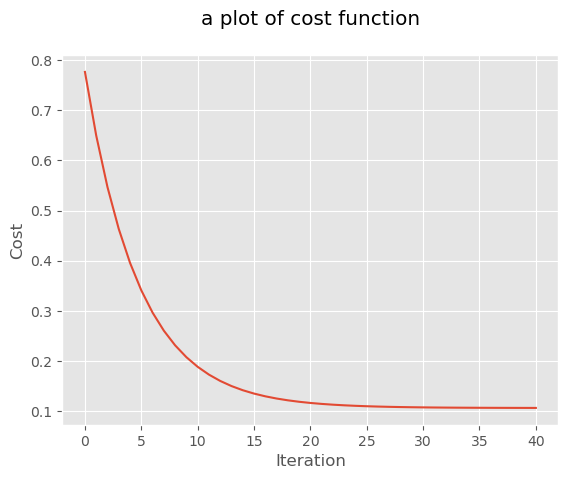

In [162]:
plt.plot(list(range(len(losses))),losses)
plt.title('a plot of cost function\n')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.plot()

In [143]:
from sklearn import linear_model

np.array(Xs).reshape(1, -1)

sk_reg = linear_model.LinearRegression()
sk_reg.fit(np.array(Xs).reshape(-1, 1), ys)

LinearRegression()

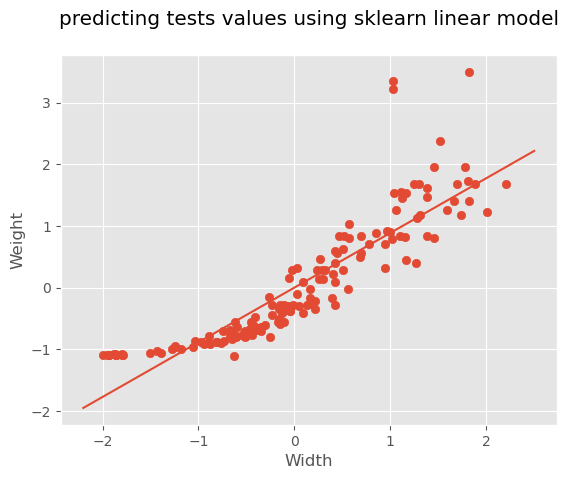

In [147]:
predicts = []
for i in tests:
    predicts.append(sk_reg.predict(np.array(i).reshape(1, -1)))

plt.title('predicting tests values using sklearn linear model\n')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.scatter(Xs, ys)
plt.plot(tests, predicts)
plt.show()

In [163]:
def cost_calculator(y, predicted):
    total_lost = 0
    for i in range(len(y)):
        total_lost += ((predicted - y)**2).sum() 
    total_lost = total_lost * (1/(2*len(y)))
    return total_lost

In [167]:
cost1 = cost_calculator(ys, reg.hypothesis(Xs))
cost2 = cost_calculator(ys, sk_reg.predict(np.array(Xs).reshape(-1, 1)))

print('\n--------------------------------------------------------------------------')
print('cost of the from scratch version on trining dataset :', cost1)
print('--------------------------------------------------------------------------')
print('cost of the scikit-learn linear regression model on training dataset :', cost2)
print('--------------------------------------------------------------------------\n')



--------------------------------------------------------------------------
cost of the from scratch version on trining dataset : 16.93384336627378
--------------------------------------------------------------------------
cost of the scikit-learn linear regression model on training dataset : 16.914377069933796
--------------------------------------------------------------------------



In [200]:
class non_linear_regressor:
    def __init__(self, alpha):
        self.alpha = alpha
        self.theta0, self.theta1, self.theta2 = self.initializer()
    
    def initializer(self):
        np.random.seed(10)
        return np.random.random(3)

    def hypothesis(self, x):
        res = self.theta0 + self.theta1 * x + self.theta2 * (x**2)
        # print('------------------- : ', x**2)
        return res
    
    def loss_functions(self, x, y):
        if type(x) == float :
            return (1 / (2*len(x))) * ((self.hypothesis(x) - y)**2)
        else :
            return (1 / (2*len(x))) * ((self.hypothesis(x) - y)**2).sum()
            
    def update(self, x, y):
        delta_theta0 = (self.hypothesis(x) - y).sum() * (1/len(x))
        delta_theta1 = ((self.hypothesis(x) - y) * x).sum() * (1/len(x))
        delta_theta2 = ((self.hypothesis(x) - y) * (x**2)).sum() * (1/len(x))

        self.theta0 = self.theta0 - self.alpha * delta_theta0
        self.theta1 = self.theta1 - self.alpha * delta_theta1
        self.theta2 = self.theta2 - self.alpha * delta_theta2

    def normalizer(self, x, y):
        x = (x - x.mean()) / x.std()
        y = (y - y.mean()) / y.std()
        return x, y

In [215]:
x_values = data.Width
y_values = data.Weight

# x_values = x_values.sort_values()
# y_values = y_values.sort_values()

[]

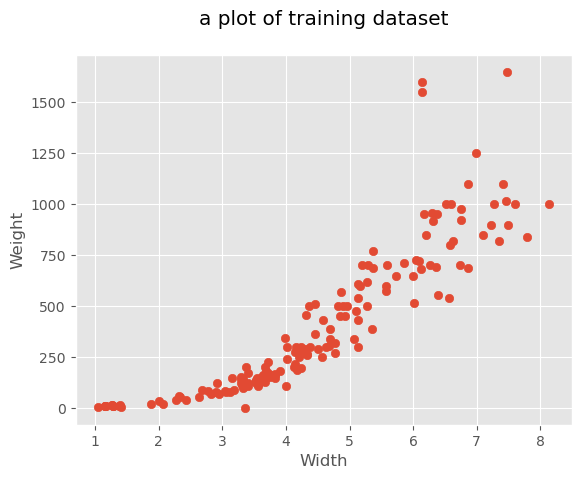

In [216]:
plt.title('a plot of training dataset\n')
plt.xlabel('Width')
plt.ylabel('Weight')
plt.scatter(x_values, y_values)
plt.plot()

In [221]:
non_lin_reg = non_linear_regressor(0.0007)
fig3, ax3 = plt.subplots()

def animate3(i):
    ax3.cla()
    ax3.scatter(x_values, y_values)
    ax3.plot(x_values.sort_values(), non_lin_reg.hypothesis(x_values).sort_values())
    non_lin_reg.update(x_values, y_values)

ani3 = FuncAnimation(fig3, animate3, frames=30, interval=300)
plt.close()

In [222]:
HTML(ani3.to_html5_video())

In [225]:
new_x_values = pd.concat([x_values, x_values ** 2], axis=1)
print(new_x_values) 
sklearn_non_reg = linear_model.Lin

      Width      Width
0    4.0200  16.160400
1    4.3056  18.538191
2    4.6961  22.053355
3    4.4555  19.851480
4    5.1340  26.357956
..      ...        ...
154  1.3936   1.942121
155  1.2690   1.610361
156  1.2558   1.577034
157  2.0672   4.273316
158  1.8792   3.531393

[159 rows x 2 columns]


In [ ]:
# some clean ups 
# read some other linear regression notebooks and get some ideas
# do linear regression with scikit learn and compare it with the from scratch version *
# do another regressor on unnormalized data and compare the results *
# write text including LaTeX form of functions
# write another class for non-linear regression (adding a extra feature)
